## Preparation

In [45]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections as cl
import math
from cycler import cycler
import numpy as np

## Sensitivity Analysis Parameter

## Read results from CSV files

### determine the variable for investigation

### Declare important variables:
Using a List for important variables such as:
* Electricity Tariff
* Budget Deficit
* Utility Energy Sale
* Consumer Numbers
    1. Regular Consumers
    2. Prosumers
    3. Defectors 
    4. Total
* Monthly Average Demand
    1. Regular Consumers
    2. Prosumers

In [46]:
# important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','Total Costs','NPV PV','Total Consumers','Defectors','Regular Consumers','Prosumers','Regular Consumer Average Demand', 'Prosumer Average Demand']
important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','Total Costs']

In [54]:
    units = pd.read_csv(directoryPath.joinpath(
        'units.csv'), squeeze=True, index_col=0)

In [56]:
units.index

Index(['Battery Cost', 'Budget Deficit', 'Defectors', 'Direct Defection NPV',
       'Electricity Tariff', 'Monthly Income Shortfall', 'NPV PV', 'PV Cost',
       'Prosumer Average Demand', 'Prosumers',
       'Regular Consumer Average Demand', 'Regular Consumers',
       'Total Consumers', 'Total Costs', 'Utility Energy Sale',
       'change in electricity tariff'],
      dtype='object', name='Real Name')

In [47]:
directoryPath = Path.cwd().joinpath('Outputs')
sensitivity_var='populationGrowth'
len([float(s.stem.split('_')[1]) for s in directoryPath.glob(f'{sensitivity_var}_*.csv')])

20

In [48]:
select_result={v:pd.DataFrame() for v in important_vars} 
for s in directoryPath.glob(f'{sensitivity_var}_*.csv'):
    sv = float(s.stem.split('_')[1])
    result=pd.read_csv(s,squeeze=True,index_col=0,dtype='float64')
    for v in important_vars:
        select_result[v][sv]=result[v]

In [49]:
    for v in important_vars:
        select_result[v].sort_index(axis=1,inplace=True)

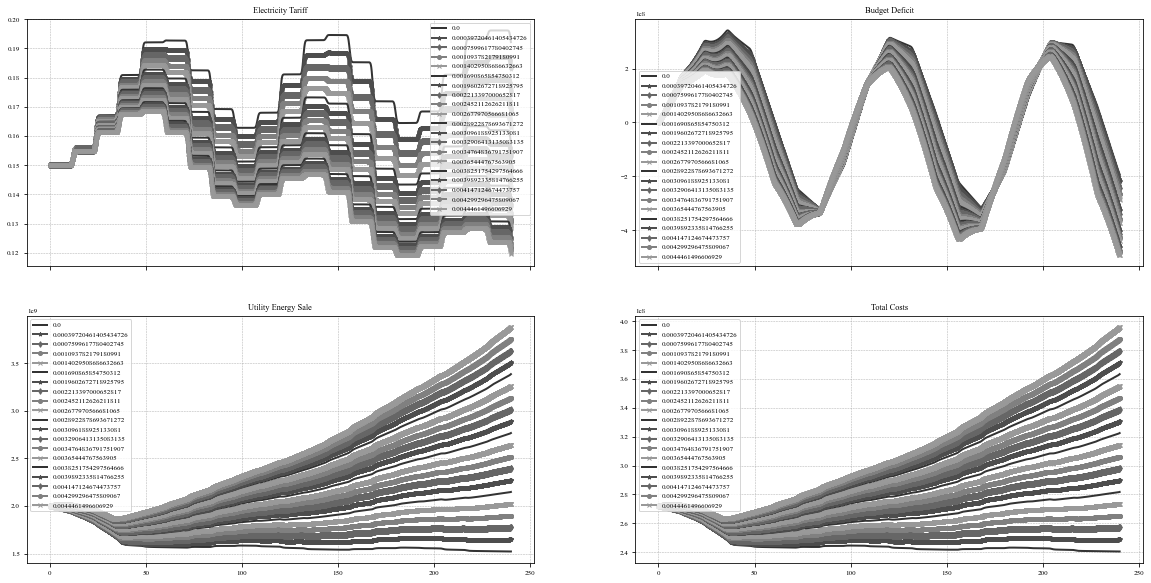

In [50]:
mpl.rc('lines',linewidth=2)  
n_rows= math.ceil(len(important_vars)/2)
fig,ax =plt.subplots(n_rows,2,sharex=True)
fig.set_size_inches(20,n_rows*5)
for i,v in enumerate(important_vars):
    cur_ax=ax[i//2,i%2]
    select_result[v].plot(ax=cur_ax)
    # select_result[v].loc[240].plot(ax=cur_ax)
    cur_ax.grid(True,linestyle='--')
    cur_ax.title.set_text(v)
    # if i in [0,1,3]:
    #     cur_ax.set_yscale('symlog')